### 神经网络学习要用到的一些数学知识

In [1]:
# 导入必要的包
import numpy as np
import matplotlib.pyplot as plt
import cv2
import my_frame as mf # 导入我自己的框架

**注意:所有的微积分操作,一定要确保数据类型是float,即输入矩阵确保dtype = np.float**

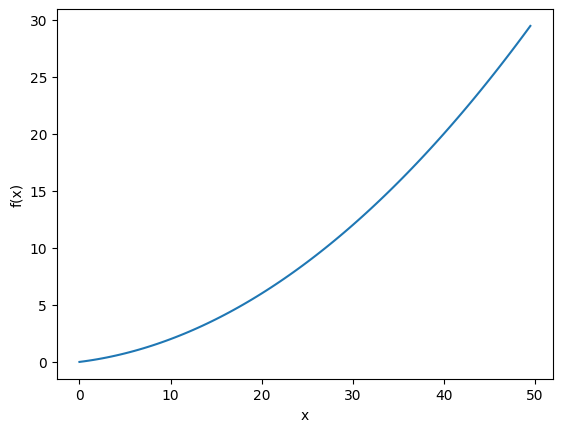

0.1999999999990898
0.2999999999986347


In [2]:
# 构建一个一元函数
def function_1(x):
    return 0.01*(x**2) + 0.1*x

# 一元函数的数值微分(近似),可以理解为导数
def numerical_diff(f,x):
    "f为向函数中传入的函数"
    h = 1e-4 # 取0.0001即可高度近似

    # 注意2*h要加括号
    return (f(x+h) - f(x-h))/(2*h) # 采用差分求导,提高准度

x = np.arange(0,50,0.5)
y = function_1(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# 计算x = 5与x = 10处的导数
print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))

# 发现与理论计算结果接近

In [3]:
# 求偏导数
# 假设函数为 y = x1*x1 + x2*x2

# 定义函数
def function_x1_x2(x):
    return x[0]**2 + x[1]**2

# 对x1求偏导的函数,x2看成定值
def numerical_diff_x1(f,x):
    h = 1e-4
    a1 = np.zeros_like(x)
    a2 = np.zeros_like(x)
    a1[1] = a2[1] = x[1]
    a1[0] = x[0] + h
    a2[0] = x[0] - h
    return (f(a1) - f(a2))/(2*h)

x = np.array([2,3],dtype = np.float32)
print(numerical_diff_x1(function_x1_x2,x))

# 结果符合预期,求x2同理,只需要修改函数即可


4.0006638


下面是深度学习中一个重要的函数:**梯度计算**

In [4]:
# 定义一个4变量多元函数
def function_four(x):
      return x[1]*x[0]**3 + 2*x[1]**2 + 3*x[2] + 4*x[3]

# 梯度计算函数
# x为一维矩阵,代表每个变量的值
def numerical_gradient(f,x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 生成与x形状相同的矩阵,起到临时存储的作用

    for i in range(x.shape[0]):
          tmp_val = x[i]

          # 计算f(x+h)
          x[i] = tmp_val + h
          fxh1 = f(x)

          # 计算f(x-h)
          x[i] = tmp_val - h
          fxh2 = f(x)

          # 最后要还原值
          x[i] = tmp_val

          # 存储下梯度
          grad[i] = (fxh1 - fxh2)/(2*h)
    return grad

x = np.array([1,2,3,4],dtype = np.float64)
grad = numerical_gradient(function_four,x)
print(grad)

#结果符合预期

[6.00000002 9.         3.         4.        ]


提出问题：**为什么要进行梯度计算?**  
我们把梯度计算法计算损失函数的最小值为**梯度下降法**  
具体原理：**梯度的方向是数值变化最快的方向，那么负梯度就是指向极小值的方向**  
利用梯度下降法逼近一个极小值(即找到使损失函数值最小的x)的做法:  

$ x_0 = x_0 - \eta \dfrac{\partial f}{\partial x_0} $

$ x_1 = x_1 - \eta \dfrac{\partial f}{\partial x_1} $

上面的$\; \eta \;$为学习率，是一个**超参数**：**需要人工设置的**  
小的话更新太慢，等于没更新；大的话就容易跳过头，导致反复横跳，故要寻找合适的值

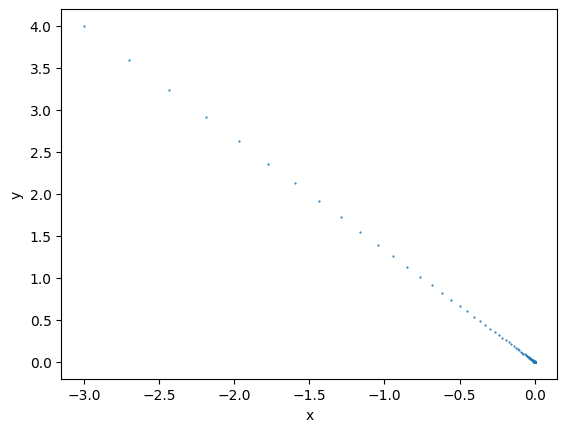

-7.968419666273994e-05 0.00010624559555026218
[-7.96841967e-05  1.06245596e-04]


In [5]:
# 梯度下降法找相对极小值
# 函数以之前的function_x1_x2为例：即y = x1^2 + x2^2

# 梯度下降可视化
def show(x,y):
    plt.scatter(x,y,s = 0.3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# 梯度下降找最小值
def gradient_descent(f,init_x,lr = 0.05,step_num = 100):
    "lr为超参数,step_num为进行梯度下降的次数"
    x = init_x

    # 下面数据用于可视化
    xw = []
    yw = []
    xw.append(x[0])
    yw.append(x[1])
    for i in range(step_num):
        grad = numerical_gradient(function_x1_x2,x)
        x -= lr*grad # 减去梯度,即往负梯度的方向去
        xw.append(x[0])
        yw.append(x[1])

    show(xw,yw)
    # 返回最后到达的点
    return x[0],x[1]

x = np.array([-3,4],dtype = np.float64)
ansx,ansy = gradient_descent(function_x1_x2,x)
print(ansx,ansy)
print(x) # 发现x也被改变了

# 发现梯度下降确实不断地往(0,0)处靠近,即可以在某种程度上找到极小值点

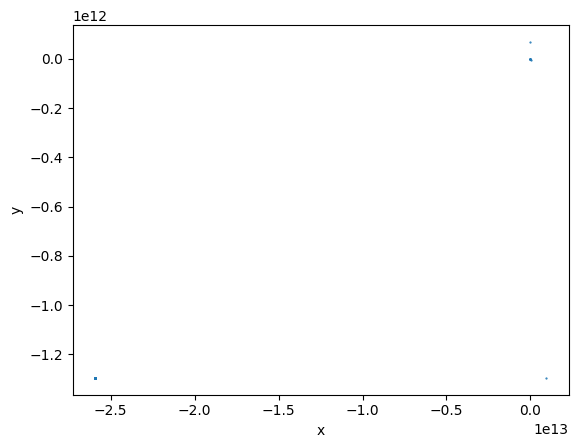

(np.float64(-25898374737328.363), np.float64(-1295248616896.5398))


In [6]:
# 如果学习率过大
x = np.array([-3,4],np.float64)
print(gradient_descent(function_x1_x2,x,lr = 10))

# 发现在来回跳

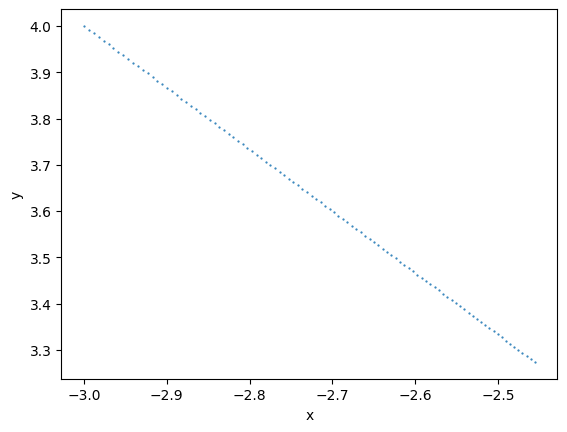

(np.float64(-2.455700414064232), np.float64(3.274267218752339))


In [7]:
# 如果学习率过小
x = np.array([-3,4],np.float64)
print(gradient_descent(function_x1_x2,x,lr = 0.001))

# 发现未能在限定步数内到达极值点,即更新太慢

以上内容是数学上的一些梯度计算方法，回归到神经网络当中，是要求出对于**给定的训练数据**，即输入矩阵，    
使得**损失函数值最小**的**权重参数矩阵**  
下面介绍便是神经网络中的矩阵求导，矩阵梯度计算，公式如下：

$ W = \begin{pmatrix} 
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
\end {pmatrix} $

$ \dfrac {\partial L}{\partial W} = 
\begin{pmatrix}
\dfrac {\partial L}{\partial w_{11}} & \dfrac {\partial L}{\partial w_{12}} & \dfrac {\partial L}{\partial w_{13}}\\
\ &  & \\
\dfrac {\partial L}{\partial w_{21}} & \dfrac {\partial L}{\partial w_{22}} & \dfrac {\partial L}{\partial w_{23}}\\
\end{pmatrix} $

下面以一个简单的神经网络为例求梯度

In [8]:
# 建立简单单层神经网络的类
class simpleNet:
    """简单的单层神经网络"""

    def __init__(self):
        """初始化权重矩阵"""
        self.W = np.random.randn(2,3) # 利用高斯分布生成随机矩阵
        # 我这里是为了检测结果是否与作者的一致,所以利用了作者的随机矩阵
        self.W[0] = np.array([0.47355232,0.9977393,0.84668094])
        self.W[1] = np.array([0.85557411,0.03563661,0.69422093])


    def predict(self,x):
        """前向传播预测"""
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        """计算损失值
        input:
        x:输出数据
        t:监督数据
        """
        z = self.predict(x) # 进行前向传播
        y = mf.softmax(z) # 初始输出层进行归一化处理,得到最终的预测矩阵
        loss = mf.cross_entropy_error(y,t)

        return loss
    
net = simpleNet()
print(net.W)

x = np.array([0.6,0.9])
print(net.predict(x))
t = np.array([0,0,1]) # one_hot格式的监督数据
print(net.loss(x,t))


[[0.47355232 0.9977393  0.84668094]
 [0.85557411 0.03563661 0.69422093]]
[1.05414809 0.63071653 1.1328074 ]
0.9280682857864075


In [9]:
x = np.array([0.6,0.9])
t = np.array([2]) # 注意第三个输出下标为2,不要越界了,进行非one_hot的测试
print(net.loss(x,t))

# 结果一致,说明了我的improve_softmax()即cross_entropy_error()的正确性

0.9280682857864075


接下来求梯度。和前面一样，我们使用numerical_gradient(f, x)求梯  
度（这里定义的函数f(W)的参数W是一个**伪参数** **实际上用不到**。因为numerical_gradient(f,x)  
会在内部执行f(x),为了与之兼容而定义了f(W)）

In [11]:
# 定义兼容的函数
def f(W):
    return net.loss(x,t)

# 开始计算权重参数矩阵梯度
dW = mf.numerical_gradient_2d(f,net.W)
print(dW)

# 结果与作者的一致，说明了mf中梯度计算的正确

[[ 0.21924757  0.14356243 -0.36281   ]
 [ 0.32887136  0.21534364 -0.544215  ]]


**感觉有点像把x,t当成定值矩阵,反而权重矩阵是输入,寻找到最小值的1坐标位置,即最合适的权重矩阵**

### 总结:
**前提**  
神经网络存在合适的权重和偏置，**调整权重和偏置**以便拟合训练数据的  
过程称为“学习”。神经网络的学习分成下面**4个步骤**。  

**步骤1（mini-batch）**  
(推荐自己框架的所有函数应该兼容批处理)  
从训练数据中随机选出一部分数据，这部分数据称为**mini-batch**。我们  
的目标是**减小mini-batch的损失函数的值**。

**步骤2（计算梯度）**  
为了减小mini-batch的损失函数的值，需要求出各个权重参数的梯度。
梯度表示损失函数的值减小最多的方向。

**步骤3（更新参数）**  
将权重参数沿梯度方向进行微小更新

**步骤4（重复）**  
重复步骤1、步骤2、步骤3